In [1]:
import torch
from torch import nn
from torchvision import utils
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Generator(nn.Module):
    def __init__(self, channels):
        super().__init__()
        # Filters [1024, 512, 256]
        # Input_dim = 100
        # Output_dim = C (number of channels)
        self.main_module = nn.Sequential(
            # Z latent vector 100
            nn.ConvTranspose2d(in_channels=100, out_channels=1024, kernel_size=4, stride=1, padding=0),
            nn.BatchNorm2d(num_features=1024),
            nn.ReLU(True),

            # State (1024x4x4)
            nn.ConvTranspose2d(in_channels=1024, out_channels=512, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(num_features=512),
            nn.ReLU(True),

            # State (512x8x8)
            nn.ConvTranspose2d(in_channels=512, out_channels=256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(True),

            # State (256x16x16)
            #nn.ConvTranspose2d(in_channels=256, out_channels=channels, kernel_size=4, stride=2, padding=1)
            nn.ConvTranspose2d(in_channels=256, out_channels=128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(num_features=128),
            nn.ReLU(True),

            # State (128x32x32)
            nn.ConvTranspose2d(in_channels=128, out_channels=channels, kernel_size=5, stride=3, padding=1)
        )
            # output of main module --> Image (Cx96x96)
        self.output = nn.Tanh()

    def forward(self, x):
        x = self.main_module(x)
        return self.output(x)

In [3]:
generator = Generator(3)
generator.load_state_dict(torch.load('generator.pkl', map_location='cuda:0'))
generator = generator.cuda(0)

In [4]:
z = torch.autograd.Variable(torch.randn(800, 100, 1, 1)).cuda(0)
samples = generator(z)
samples = samples.mul(0.5).add(0.5)
samples = samples.data.cpu()[:64]
grid = utils.make_grid(samples)

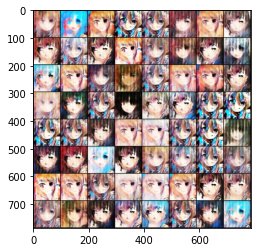

In [5]:
image = np.transpose(grid.numpy(), (1, 2, 0))
plt.imshow(image)
plt.show()

In [6]:
utils.save_image(grid, 'result-20.jpg')